<a href="https://colab.research.google.com/github/abirhazra/Reinforcement-Learning/blob/main/DDPG_agent(Actor_Critic)_with_Keras_RL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.14
!pip install keras-rl2
# !pip install tensorflow==2.3.0
# !pip install gym
# !pip install keras
# !pip install keras-rl2

     |████████████████████████████████| 109.3MB 99kB/s 
     |████████████████████████████████| 491kB 52.4MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 3.2MB 50.0MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 394.3MB 42kB/s 
     |████████████████████████████████| 471kB 53.8MB/s 
     |████████████████████████████████| 10.6MB 48.2MB/s 
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully unins

In [2]:
import numpy as np
import gym

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Input, Concatenate
from keras.optimizers import Adam, Adadelta, Adagrad, Adamax, SGD, RMSprop

from rl.agents import  DDPGAgent
from rl.memory import SequentialMemory
from rl.random import  OrnsteinUhlenbeckProcess

In [3]:
ENV_NAME = 'Pendulum-v0'

In [4]:
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)

[123]

In [5]:
nb_actions = env.action_space.shape[0]
nb_actions

1

In [6]:
actor = Sequential()
actor.add(Flatten(input_shape = (1,) + env.observation_space.shape))
actor.add(Dense(128))
actor.add(Activation('relu'))
actor.add(Dense(64))
actor.add(Activation('relu'))
actor.add(Dense(32))
actor.add(Activation('relu'))
actor.add(Dense(nb_actions))
actor.add(Activation('linear'))
print(actor.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0

In [7]:
action_input = Input(shape=(nb_actions,),name='action_input')
observation_input = Input(shape=(1,) + env.observation_space.shape, name= 'observation_input')
flattened_observation = Flatten()(observation_input)
x = Concatenate() ([action_input, flattened_observation])
x=Dense(128)(x)
x=Activation('relu')(x)
x=Dense(64)(x)
x=Activation('relu')(x)
x=Dense(32)(x)
x=Activation('relu')(x)
x=Dense(1)(x)
x=Activation('linear')(x)
critic = Model(inputs = [action_input, observation_input], outputs = x)
print(critic.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observation_input (InputLayer)  [(None, 1, 3)]       0                                            
__________________________________________________________________________________________________
action_input (InputLayer)       [(None, 1)]          0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 3)            0           observation_input[0][0]          
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 4)            0           action_input[0][0]               
                                                                 flatten_1[0][0]              

In [8]:
from rl.random import OrnsteinUhlenbeckProcess

In [9]:
memory = SequentialMemory(limit=100000, window_length = 1)

random_process = OrnsteinUhlenbeckProcess(size = nb_actions, theta = .15, mu = 0, sigma = 0.3)

agent = DDPGAgent(nb_actions = nb_actions, actor = actor, critic = critic, critic_action_input = action_input, memory = memory, nb_steps_warmup_critic = 100, nb_steps_warmup_actor = 100, random_process = random_process, gamma=.99, target_model_update = 1e-3 )

agent.compile(RMSprop(learning_rate=1e-2), metrics=['mae'])

history = agent.fit(env, nb_steps= 50000, visualize= False, verbose=1, nb_max_episode_steps=200)

agent.save_weights('ddpg_{}_weightd.h5f'.format(ENV_NAME), overwrite=True)

agent.test(env, nb_episodes=5, visualize=False, nb_max_episode_steps=200)

RMSprop
Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 97s 9ms/step - reward: -6.6327
50 episodes - episode_reward: -1326.547 [-1742.717, -540.494] - loss: 3.307 - mae: 1.238 - mean_q: -30.308

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 96s 10ms/step - reward: -3.2734
50 episodes - episode_reward: -654.688 [-1511.867, -131.341] - loss: 14.845 - mae: 2.279 - mean_q: -65.877

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: -1.8160
50 episodes - episode_reward: -363.199 [-926.866, -9.099] - loss: 21.661 - mae: 2.619 - mean_q: -69.666

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: -1.0274
50 episodes - episode_reward: -205.480 [-640.305, -1.805] - loss: 24.153 - mae: 2.606 - mean_q: -63.733

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 98s 10ms/step - reward: -1.1093
done, took 485.075 seconds
Testing for 5

In [12]:
import matplotlib.pyplot as plt 

In [13]:
print(history.history.keys())
hist1=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


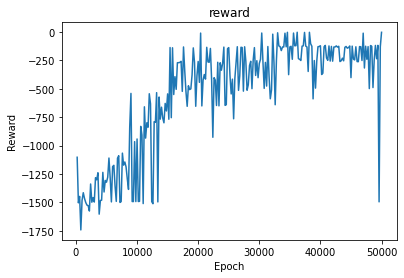

-554.3541352333626


In [14]:
plt.plot(hist1.history['nb_steps'],hist1.history['episode_reward'])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist1.history['episode_reward']))

In [15]:
scores = agent.test(env, nb_episodes=10000, visualize=False)
print(np.mean(scores.history['episode_reward']))

Streaming output truncated to the last 5000 lines.
Episode 5002: reward: -124.443, steps: 200
Episode 5003: reward: -124.531, steps: 200
Episode 5004: reward: -246.379, steps: 200
Episode 5005: reward: -316.323, steps: 200
Episode 5006: reward: -121.964, steps: 200
Episode 5007: reward: -7.105, steps: 200
Episode 5008: reward: -127.222, steps: 200
Episode 5009: reward: -122.503, steps: 200
Episode 5010: reward: -120.989, steps: 200
Episode 5011: reward: -242.804, steps: 200
Episode 5012: reward: -370.194, steps: 200
Episode 5013: reward: -252.727, steps: 200
Episode 5014: reward: -240.270, steps: 200
Episode 5015: reward: -249.078, steps: 200
Episode 5016: reward: -129.546, steps: 200
Episode 5017: reward: -137.414, steps: 200
Episode 5018: reward: -122.017, steps: 200
Episode 5019: reward: -119.920, steps: 200
Episode 5020: reward: -132.953, steps: 200
Episode 5021: reward: -127.803, steps: 200
Episode 5022: reward: -250.853, steps: 200
Episode 5023: reward: -126.307, steps: 200
Episo

In [16]:
p=agent.test(env, nb_episodes=1, visualize=False)

Testing for 1 episodes ...
Episode 1: reward: -7.637, steps: 200


In [17]:
p.history.keys()

dict_keys(['episode_reward', 'nb_steps'])

In [18]:
# del dqn
# dqn = build_agent(model, actions)
# dqn.compile(Adam(learning_rate=1e-2), metrics=['mae'])
# history=dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

agent.compile(Adam(lr=0.001, clipnorm=1.), metrics=['mae'])

history = agent.fit(env, nb_steps= 50000, visualize= False, verbose=1, nb_max_episode_steps=200)

Adam
Training for 50000 steps ...
Interval 1 (0 steps performed)
   45/10000 [..............................] - ETA: 11s - reward: -5.1824  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 101s 10ms/step - reward: -0.7761
50 episodes - episode_reward: -155.228 [-403.654, -2.508] - loss: 14.066 - mae: 1.275 - mean_q: -46.893

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: -0.6609
50 episodes - episode_reward: -132.181 [-458.262, -0.614] - loss: 15.247 - mae: 1.237 - mean_q: -41.725

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 104s 10ms/step - reward: -0.7570
50 episodes - episode_reward: -151.394 [-339.300, -1.611] - loss: 14.174 - mae: 1.150 - mean_q: -37.246

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 106s 11ms/step - reward: -0.9564
50 episodes - episode_reward: -191.277 [-1496.874, -1.213] - loss: 14.789 - mae: 1.355 - mean_q: -31.203

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 107s 11ms/step - reward: -2.0794
done, took 520.486 seconds


In [19]:
print(history.history.keys())
hist2=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


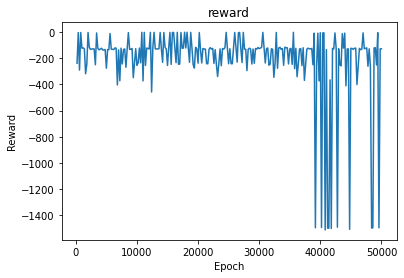

-209.19052719212632


In [20]:
# plt.plot(hist2.history['nb_steps'][0:100],hist2.history['episode_reward'][0:100])
plt.plot(hist2.history['nb_steps'],hist2.history['episode_reward'])
# plt.plot(hist.history[])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist2.history['episode_reward']))

In [21]:
# del dqn
# dqn = build_agent(model, actions)
# dqn
# dqn.compile(SGD(learning_rate=1e-2), metrics=['mae'])
# history=dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

agent.compile(SGD(lr=0.001, clipnorm=1.), metrics=['mae'])

history = agent.fit(env, nb_steps= 50000, visualize= False, verbose=1, nb_max_episode_steps=200)

SGD
Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 26:53 - reward: -1.1631

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 106s 11ms/step - reward: -0.7862
50 episodes - episode_reward: -157.237 [-416.417, -2.493] - loss: 12.404 - mae: 1.306 - mean_q: -21.803

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 107s 11ms/step - reward: -0.8102
50 episodes - episode_reward: -162.047 [-372.376, -2.123] - loss: 10.094 - mae: 1.317 - mean_q: -9.428

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 106s 11ms/step - reward: -0.7983
50 episodes - episode_reward: -159.654 [-339.144, -1.102] - loss: 6.275 - mae: 1.082 - mean_q: -2.133

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 106s 11ms/step - reward: -0.6956
50 episodes - episode_reward: -139.119 [-337.325, -2.026] - loss: 5.235 - mae: 0.901 - mean_q: 1.284

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 105s 10ms/step - reward: -0.7864
done, took 530.249 seconds


In [22]:
print(history.history.keys())
hist3=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


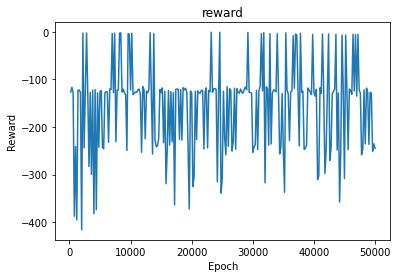

-155.0676887792647


In [23]:
plt.plot(hist3.history['nb_steps'],hist3.history['episode_reward'])
# plt.plot(hist.history[])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist3.history['episode_reward']))

In [24]:
# del dqn
# dqn = build_agent(model, actions)
# dqn.compile(Adamax(learning_rate=1e-2), metrics=['mae'])
# history=dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

agent.compile(Adamax(learning_rate=1e-2), metrics=['mae'])

history = agent.fit(env, nb_steps= 50000, visualize= False, verbose=1, nb_max_episode_steps=200)

Adamax
Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


10000/10000 [==============================] - 106s 11ms/step - reward: -1.5495
50 episodes - episode_reward: -309.910 [-1239.898, -7.231] - loss: 5.447 - mae: 0.951 - mean_q: 3.184

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 105s 11ms/step - reward: -0.6286
50 episodes - episode_reward: -125.718 [-336.017, -1.201] - loss: 4.545 - mae: 0.883 - mean_q: 4.248

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 105s 11ms/step - reward: -1.1198
50 episodes - episode_reward: -223.954 [-1267.571, -4.742] - loss: 4.871 - mae: 0.886 - mean_q: 5.334

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 105s 10ms/step - reward: -0.9273
50 episodes - episode_reward: -185.469 [-1222.802, -3.079] - loss: 4.916 - mae: 0.934 - mean_q: 6.822

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 105s 10ms/step - reward: -2.4415
done, took 525.962 seconds


In [25]:
print(history.history.keys())
hist4=history

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


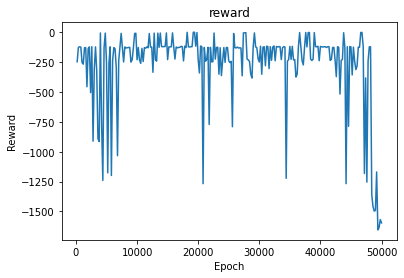

-266.6694398837029


In [26]:
plt.plot(hist4.history['nb_steps'],hist4.history['episode_reward'])
# plt.plot(hist.history[])
plt.title('reward')
plt.ylabel('Reward')
plt.xlabel('Epoch')
plt.show()
print(np.mean(hist4.history['episode_reward']))

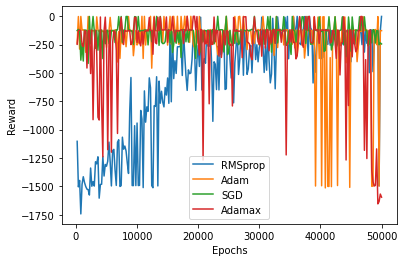

In [27]:
plt.figure()
plt.plot(hist1.history['nb_steps'],hist1.history['episode_reward'], label='RMSprop')
plt.plot(hist2.history['nb_steps'],hist2.history['episode_reward'],label='Adam')
plt.plot(hist3.history['nb_steps'],hist3.history['episode_reward'],label='SGD')
plt.plot(hist4.history['nb_steps'],hist4.history['episode_reward'],label='Adamax')
#plt.plot(train_loss5, color='navy', alpha=0.8, label='Adadelta')
#plt.title("Network Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Reward")
plt.legend()
plt.show()